In [153]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

In [154]:
messy_df = pd.read_pickle('../data/messy_df.pkl')

In [155]:
messy_df.head()

,created_utc,subreddit,subreddit_subscribers,name_code,title,text,upvote_ratio,num_comments,url,image?,image_text
0,1.502177e+09,TheRedPill,0.0,t3_6sbx6i,Google Fires Ph.D Biologist/Engineer For Claim...,"As reported in Bloomberg, Google has fired a s...",0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,
1,1.480424e+09,TheRedPill,0.0,t3_5fihmu,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,**A complete guide to picking up 9s and 10s** ...,0.83,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,
2,1.502101e+09,TheRedPill,0.0,t3_6s4mfa,I have been practicing Stoicism for 3 years no...,**Practical Stoicism Tools**\n\nStoicism philo...,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,
3,1.433962e+09,TheRedPill,0.0,t3_39bvdm,"[META] Reddit rolls out first ban wave of ""Har...",The most notorious target was FatPeopleHate. Y...,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,
4,1.500270e+09,TheRedPill,0.0,t3_6nr5yo,"Man gets his ex-GF to pay child support, and R...",Kind of surprised this hasn't made its way her...,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,


In [156]:
messy_df['total_text'] = messy_df['title'] + ' ' + messy_df['image_text'] + ' ' + messy_df['text']

In [157]:
messy_df = messy_df.drop(columns= ['title', 'text'])

In [158]:
messy_df['total_text'].dropna()

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
18904        Trumpman Gas and food prices got me like\n\n 
18905    Oof big burn and so true 5 ft\nai NOT ALL BIDE...
18906    socialists love socialism unless they’re playi...
18907    Thousands Sign Petition Calling For Nancy Pelo...
18908    True IFALIBERALFROM IF A LIBERAL FROM\n1960 SH...
Name: total_text, Length: 18909, dtype: object

In [159]:
messy_df['total_text']

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
18904        Trumpman Gas and food prices got me like\n\n 
18905    Oof big burn and so true 5 ft\nai NOT ALL BIDE...
18906    socialists love socialism unless they’re playi...
18907    Thousands Sign Petition Calling For Nancy Pelo...
18908    True IFALIBERALFROM IF A LIBERAL FROM\n1960 SH...
Name: total_text, Length: 18909, dtype: object

In [160]:
stopwords_ = stopwords.words('English')
stopwords_ += list(string.punctuation)
stopwords_ += ['’', "'s", "n't", "''", '``', '--', '”', '“', "'m", '...', "'ll", "'d", '‘', "'re", "'ve", "\\-", '—', '–', 'x200b', '..', '....', '©']

stopwords_ += ['r', 'www', 'https', 'http', 'com', 'post', 'sub', 'account', 'imgur', 'amp', 'jpg', 'png'] #commonly used reddit link words
stopwords_ += ['like', 'would', 'much', 'also', 'really', 'even', 'gt', 'us', 'never', 'see', 'way', 'could', 'back', 'need', 'take', 'get',
                 'one', 'time', 'want', 'make', 'know', 'thing', 'got', 'many', 'every', 'let', 'lot', 'ever', 'around', 'put', 'enough', 
                 'sure', 'may', 'must', 'went', 'often', 'might', 'get', 'probably', 'literally', 'though', 'else', 'least', 'yet', 'set', 
                 'oh', 'na', 'finally', 'nbsp', 'almost', 'simply', 'wo', 'whatever', 'sometimes', 'completely', 'permanently', 'actual', 'possible',
                 'absolutely', 'within', 'including', 'thing', 'something'] #common words in the dataset

In [161]:
lemmatizer = WordNetLemmatizer()

In [162]:
def stop_and_lemmatize(string):
    """
    Helper function for eda on the total corpus
    """
    # word_list = re.split(r'[^a-zA-Z]', string)
    # current = list(filter(None, word_list))

    current = word_tokenize(string)

    total = [x.lower() for x in current if x.lower() not in stopwords_ and len(x) > 1]

    final = [lemmatizer.lemmatize(x) for x in total]

    return final

In [163]:
messy_df['tokenned_stopped_text'] = messy_df['total_text'].apply(stop_and_lemmatize)

In [164]:
messy_df

,created_utc,subreddit,subreddit_subscribers,name_code,upvote_ratio,num_comments,url,image?,image_text,total_text,tokenned_stopped_text
0,1.502177e+09,TheRedPill,0.0,t3_6sbx6i,0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim..."
1,1.480424e+09,TheRedPill,0.0,t3_5fihmu,0.83,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t..."
2,1.502101e+09,TheRedPill,0.0,t3_6s4mfa,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, year, quality, life, in..."
3,1.433962e+09,TheRedPill,0.0,t3_39bvdm,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi..."
4,1.500270e+09,TheRedPill,0.0,t3_6nr5yo,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,..."
...,...,...,...,...,...,...,...,...,...,...,...
18904,1.615652e+09,Republican,179702.0,t3_m49fng,0.77,208.0,https://i.redd.it/90luuapzltm61.jpg,True,Gas and food prices got me like\n\n,Trumpman Gas and food prices got me like\n\n,"[trumpman, gas, food, price]"
18905,1.598371e+09,Republican,179702.0,t3_igex7g,0.71,370.0,https://i.redd.it/dffp4yv686j51.jpg,True,5 ft\nai NOT ALL BIDEN}\n\n~~ SUPPORTERS\n\nAK...,Oof big burn and so true 5 ft\nai NOT ALL BIDE...,"[oof, big, burn, true, ft, ai, biden, ~~, supp..."
18906,1.598216e+09,Republican,179702.0,t3_ifaxt6,0.84,160.0,https://i.redd.it/c6saxwt4eti51.jpg,True,outer\nsocia SOCIALISTS 4\n\n,socialists love socialism unless they’re playi...,"[socialist, love, socialism, unless, playing, ..."
18907,1.599842e+09,Republican,179702.0,t3_iqtxd2,0.84,165.0,https://www.dailywire.com/news/thousands-sign-...,False,,Thousands Sign Petition Calling For Nancy Pelo...,"[thousand, sign, petition, calling, nancy, pel..."


In [165]:
corpus_series = messy_df['tokenned_stopped_text']

In [166]:
corpus_series

0        [google, fire, ph.d, biologist/engineer, claim...
1        [laid, warlord, 37, rule, approaching, model-t...
2        [practicing, stoicism, year, quality, life, in...
3        [meta, reddit, roll, first, ban, wave, harassi...
4        [man, get, ex-gf, pay, child, support, reddit,...
                               ...                        
18904                         [trumpman, gas, food, price]
18905    [oof, big, burn, true, ft, ai, biden, ~~, supp...
18906    [socialist, love, socialism, unless, playing, ...
18907    [thousand, sign, petition, calling, nancy, pel...
18908    [true, ifaliberalfrom, liberal, 1960, showed, ...
Name: tokenned_stopped_text, Length: 18909, dtype: object

In [167]:
new_corpus_series = []

for word_list in corpus_series:
    new_corpus_series.extend(word_list)

In [168]:
new_corpus_series = pd.Series(new_corpus_series)

In [169]:
len(new_corpus_series)

709766

In [170]:
freqdist = FreqDist(new_corpus_series)
most_common = freqdist.most_common(500)
most_common

[('people', 4626),
 ('woman', 4018),
 ('year', 2576),
 ('trump', 2269),
 ('men', 2242),
 ('day', 2091),
 ('say', 2007),
 ('go', 2004),
 ('think', 1940),
 ('life', 1801),
 ('right', 1787),
 ('guy', 1750),
 ('girl', 1687),
 ('twitter', 1660),
 ('man', 1582),
 ('going', 1501),
 ('new', 1485),
 ('work', 1445),
 ('good', 1438),
 ('comment', 1413),
 ('first', 1409),
 ('said', 1303),
 ('feel', 1292),
 ('still', 1258),
 ('look', 1171),
 ('made', 1150),
 ('friend', 1080),
 ('child', 1071),
 ('pm', 1060),
 ('share', 1029),
 ('come', 1018),
 ('thing', 1015),
 ('world', 1014),
 ('give', 1010),
 ('someone', 1006),
 ('well', 1004),
 ('fuck', 996),
 ('state', 992),
 ('biden', 980),
 ('love', 978),
 ('everyone', 952),
 ('edit', 950),
 ('use', 948),
 ('sex', 927),
 ('actually', 901),
 ('point', 892),
 ('ca', 891),
 ('ago', 890),
 ('tell', 883),
 ('kid', 883),
 ('person', 867),
 ('thought', 862),
 ('reply', 861),
 ('old', 860),
 ('getting', 856),
 ('shit', 852),
 ('today', 848),
 ('school', 846),
 ('cal

In [171]:
top_30 = most_common[0:30]

In [172]:
x = []
y = []

for tuple in top_30:
    x.append(tuple[0])
    y.append(tuple[1])

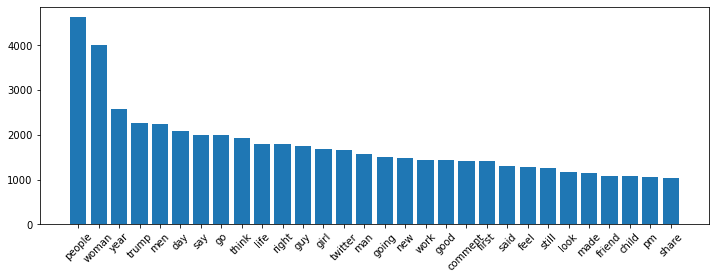

In [173]:
fig, ax = plt.subplots()

fig.set_figwidth(12)

ax.bar(x,y)
plt.xticks(rotation = 45)
plt.show()

In [174]:
messy_df['finalized_text'] = messy_df['tokenned_stopped_text'].apply(lambda x: " ".join(x))

## Combine text by subreddit for clustering

In [175]:
agg_df = messy_df.drop(columns = ['created_utc', 'num_comments', 'subreddit_subscribers', 'upvote_ratio', 'image?', 'url'])

In [176]:
agg_df.head()

,subreddit,name_code,image_text,total_text,tokenned_stopped_text,finalized_text
0,TheRedPill,t3_6sbx6i,,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim...",google fire ph.d biologist/engineer claiming a...
1,TheRedPill,t3_5fihmu,,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t...",laid warlord 37 rule approaching model-tier gi...
2,TheRedPill,t3_6s4mfa,,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, year, quality, life, in...",practicing stoicism year quality life increase...
3,TheRedPill,t3_39bvdm,,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi...",meta reddit roll first ban wave harassing subr...
4,TheRedPill,t3_6nr5yo,,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,...",man get ex-gf pay child support reddit freak k...


In [177]:
total_text_dict = {}

for index, row in agg_df.iterrows():
    if row['subreddit'] in total_text_dict.keys():
        total_text_dict[row['subreddit']] = total_text_dict[row['subreddit']] + ' ' + row['finalized_text']
    else:
        print(row['subreddit'])
        total_text_dict[row['subreddit']] = row['finalized_text']

TheRedPill
BlackPeopleTwitter
WhitePeopleTwitter
politics
law
news
worldnews
Jokes
funny
gaming
Games
technology
tech
technews
gadgets
space
science
nextfuckinglevel
MurderedByWords
mildlyinteresting
Damnthatsinteresting
mildlyinfuriating
wallstreetbets
Superstonk
shitposting
pcmasterrace
teenagers
PublicFreakout
memes
AskReddit
AskAnAmerican
Gamingcirclejerk
nottheonion
gatesopencomeonin
wholesomememes
wholesome
interestingasfuck
PoliticalCompassMemes
PoliticalHumor
AskMen
AskWomen
TooAfraidToAsk
MadeMeSmile
rareinsults
UFOs
HighStrangeness
todayilearned
RoastMe
CryptoCurrency
Wellthatsucks
barstoolsports
awfuleverything
unpopularopinion
atheism
Christianity
Catholicism
changemyview
Coronavirus
COVID19
coronavirusNYC
Masks4All
environment
environment2
TrollXChromosomes
TrollYChromosome
WikiLeaks
4chan
greentext
NoStupidQuestions
offmychest
texas
TexasPolitics
CanadaPolitics
florida
terriblefacebookmemes
insanepeoplefacebook
ShitMomGroupsSay
masskillers
Parenting
Marriage
neoliberal
sp

In [178]:
final_df = pd.DataFrame.from_dict(total_text_dict, orient = 'index')

In [179]:
final_df = final_df.rename(columns = {0 : 'text'})

In [180]:
final_df.index

Index(['TheRedPill', 'BlackPeopleTwitter', 'WhitePeopleTwitter', 'politics',
       'law', 'news', 'worldnews', 'Jokes', 'funny', 'gaming',
       ...
       'CCW', 'Glocks', 'tacticalgear', 'liberalgunowners', 'HillaryForPrison',
       'Offensivejokes', 'climateskeptics', 'LockdownCriticalLeft',
       'FightingFakeNews', 'Republican'],
      dtype='object', length=190)

In [181]:
# Pickle data for modeling

pd.to_pickle(final_df, '../data/preprocessed_df.pkl')

## Topic Modeling

In [182]:
lda_text = final_df['text'].apply(lambda x: x.split(" "))

In [183]:
corpus_dictionary = Dictionary(lda_text)
corpus = [corpus_dictionary.doc2bow(text) for text in lda_text]

In [184]:
lda = LdaModel(corpus, num_topics = 5, id2word= corpus_dictionary)

In [185]:
lda.print_topics(num_words = 20)

[(0,
  '0.006*"people" + 0.005*"woman" + 0.004*"trump" + 0.003*"men" + 0.003*"year" + 0.003*"say" + 0.003*"right" + 0.003*"man" + 0.003*"twitter" + 0.002*"girl" + 0.002*"think" + 0.002*"comment" + 0.002*"good" + 0.002*"day" + 0.002*"go" + 0.002*"guy" + 0.002*"biden" + 0.002*"first" + 0.002*"feel" + 0.002*"going"'),
 (1,
  '0.007*"people" + 0.005*"woman" + 0.004*"men" + 0.003*"trump" + 0.003*"year" + 0.003*"say" + 0.003*"think" + 0.003*"go" + 0.002*"going" + 0.002*"new" + 0.002*"day" + 0.002*"life" + 0.002*"guy" + 0.002*"good" + 0.002*"man" + 0.002*"right" + 0.002*"comment" + 0.002*"twitter" + 0.002*"still" + 0.002*"said"'),
 (2,
  '0.006*"woman" + 0.006*"people" + 0.004*"year" + 0.003*"go" + 0.003*"work" + 0.003*"guy" + 0.003*"day" + 0.003*"think" + 0.002*"girl" + 0.002*"new" + 0.002*"men" + 0.002*"right" + 0.002*"life" + 0.002*"comment" + 0.002*"man" + 0.002*"say" + 0.002*"et" + 0.002*"good" + 0.002*"friend" + 0.002*"first"'),
 (3,
  '0.006*"people" + 0.005*"woman" + 0.003*"day" + 0.0

In [186]:
messy_df.to_csv('../data/posts.csv')